Using logisting regression techniques covered in week 3 to explore the fashion_MNIST dataset

# 1. Introduction

The aim of part B is to use the logistic regression techniqes applied on MNIST dataset, on Zalando's fashion MNIST dataset.

1.1. <b>Logistic Regression :</b> Logistic Regression is a statistical method used for analyzing datasets in which there are one or more independent variables that determine an outcome. Logistic Regression is used when the dependent variable (target) is categorical. The outcome is typically a binary outcome, such as 1/0, true/false, although logistic regression can be extended to handle multi-class classification problems as well. Our goal is to use logistic regression to train a model that can classify 10 classes using the grayscale images present in the fashion_MNIST dataset.

1.2 <b>About dataset : </b> Fashion MNIST is a dataset of Zlando's article images comprised of grayscale apparel images. The Aim of the dataset is to be a replacement of the MNIST datset to benchmark ML algorithms. 
The training set contains 60,000 examples and the test set has 10,000 datsets.
Each example is a 28x28 grayscale image and has an assigned label.
There are 10 unique lable classes such as T-shirt, Trouser, Ankle-Boot etc.
The dataset comprises images that pose a classification challenge beyond the capacity of human visual discernment.

<img src="dataset-cover.png" />
<center>Fashion MNIST data-cover</center>

# 2. Logistic Regression Pipeline

2.1 Loading libraries like pandas for data manipulation, matplotlib to plot data, sklearn to import the classificarion algorithm, data splittin and measure accuracy

In [1]:
import numpy as np
import pandas as pd
import math
import itertools
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

/usr/local/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# 4. <b>Retrieving data</b>
Loadin data from "fashio_MNIST" dir in the working directory using  using pandas read_csv().  
<b>THE CODE CELL BELOW WILL HAVE TO BE REPLACED WITH CORRECT PATH IF THE DATASET IS STORED ANYWHERE ELSE.</b>

In [2]:
df_train = pd.read_csv("fashion_MNIST/fashion-mnist_train.csv")
df_test = pd.read_csv("fashion_MNIST/fashion-mnist_test.csv")

# 5. <b>Exploring data</b> 

<b>5.1 Explore the data and images : </b> Cheking the first few rows of the data can provide us with how data is arranged, how the dataset is labelled, data types and what variables are present in the dataset

In [3]:
df_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# checking dataframe shape
# 60,000 values
# 785 variables
df_train.shape

(60000, 785)

The label contains numerical value, for ease of understanding the values can be mapped to a dictionary where each unique value from the label column corresponds to an apparel.  
df_train.dtypes() will show us the data type of each column.  
The label is int64 or numerical value, so the dictioanry key value will be of type integer and value can be String.  
In the dataset -  
• Label: The Target variable.  
• Pixels: The smallest unit of a Digital Image.

In [4]:
#label is int64 not string
mapping = {
    0 : 'T-shirt/top',
    1 : 'Trouser',
    2 : 'Pullover',
    3 : 'Dress',
    4 : 'Coat',
    5 : 'Sandal',
    6 : 'Shirt',
    7 : 'Sneaker',
    8 : 'Bag',
    9 : 'Ankle boot'}

In [6]:
# mapping the values
temp = df_train.replace({"label" : mapping})
temp.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,Pullover,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Ankle boot,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Shirt,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,T-shirt/top,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,Dress,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Using matplotlib we can plot the pixel values from the datset which are in column 1-784.  
Reshaping the values to 28x28 will give us a 28x28 matrix that can represent the original image.  
The image along with the label will provide us a better understandsing of the dataset.

Text(0.5, 1.0, 'T-shirt/top')

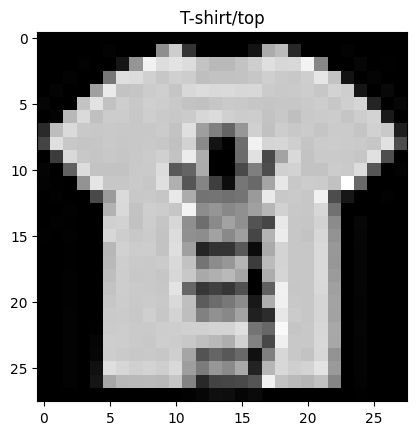

In [7]:
# get label
label = temp.iloc[:, 0]
# getting 28x28 matrix that will represent the image
# using a random value 13 to show th result
img = temp.drop('label', axis=1).values[13].reshape(28,28)
plt.imshow(img, cmap='gray')
plt.title(label[13])

<b>5.2 Corresponding Matrix : </b> The img variable holds the 28x28 corresponding matrix that represents the previous image

In [11]:
img

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   3,   0,   0,   0, 142, 205,  52,   0,
          0,   0,   0,  19, 171, 187,  41,   0,   0,   0,   3,   0,   0,
          0,   0],
       [  0,   0,   0,   2,   0,   0,  21, 149, 241, 221, 227, 220, 196,
        185, 185, 195, 206, 223, 215, 216, 244, 135,   0,   0,   6,   0,
          1,   0],
       [  0,   0,   3,   0,   0, 119, 223, 220, 208, 199, 208, 205, 191,
        194, 194, 195, 199, 207, 202, 200, 206, 230, 196,  19,   0,   4,
          0,   0],
       [  0,   4,   0,   0, 160, 234, 196, 197, 204, 207, 197, 216, 220,
        217, 218, 215, 216, 203, 201, 202, 205, 199, 211, 206,  21,   0,
          8,   0],
       [  5,   0,   0, 196, 226, 194, 206, 200, 207, 205, 201, 195, 193,
        198, 202, 201, 198, 197, 199, 199, 202, 205, 199, 207, 213,  36,
          0,   6],
       [  

<b>5.3 Describe the dataset: </b> Exploring the dataset sheds light on the data structure of this particular dataset.  
    a) The dataset is comprised of numerical values.  
    b) The first column(0) represents the labels which have been mapped to string values.  
    c) The rest of the columns(1-784) represent the pixel values.  
    d) Reshaping the pixel values to a 28x28 matrix can provide us with a corresponding matrix of the image.  
    e) The matrix can be plotted to get the original image.  
    f) The pixel values range from 0 - 255, can be normalized before using for logistic regression.  
    g) The label values has to be casted to categorical type before we can use it for logistic regression.

<b>5.4 Data cleansing : </b> We need to chek if the dataset has any missing values and if yes, how the missing parametres can be filled or discarded.  
Upon checking it seems the dataset has no missing values, so no further action required.

In [ ]:
#check for NA
df_train.isna().sum()
df_train = df_train.dropna() #doesnt have any NA anyway

# 6. Building a logistic regression model

<b>6.1 Loading packages : </b> Packages required for the logistic regression model are Logistic Regression, Train_test_split, confusion_matrix, classification_report from sklearn.  
    The packages have been loaded at the beginning of the notebook

<b>6.2 Target Variable : </b>

In [3]:
#X colums
X = df_train[df_train.columns[1:]]
#pred
y = df_train["label"]

In [4]:
#same for test
testX = df_test[df_test.columns[1:]]
testY = df_test["label"]

<b>6.3 Data preparation : </b> Data preparation will include the following actions -  
    a) Normalize the test and train dataset, so we need to divide the numerical values with 255  
    b) Convert the labels to categorical variables since logistic regression only work when predicted variables are categorical

In [5]:
#preparing the test dataset
#scaling
testX = testX.astype("float32")/255
testY = pd.Categorical(testY)

In [6]:
#preparing the training set
#data scaling
X = X.astype("float32")/255
#y needs to be converted into categorical
y = pd.Categorical(y)

<b>6.4 Data splitting between Train and Validation : </b> 
The division of the training data into two distinct sets, namely the "Training Set" and the "Validation Set," serves specific purposes within the context of our study. The Training Set is primarily employed for the training of our machine learning model, allowing it to learn and adjust its parameters based on the provided data. In contrast, the Validation Set serves as a means to assess the performance and generalization capabilities of our model on the dataset.
To achieve this division, we employ the "train_test_split" method provided by the scikit-learn library, a widely-used machine learning toolkit. This method facilitates the creation of these separate sets, enabling us to effectively train and evaluate the model's performance in a systematic manner.

In [7]:
X, validation_train, y, validation_test = train_test_split(X, y,test_size=0.1, random_state=66)

<b>6.5 Selecting a linear regressuion classifier : </b>

In [10]:
#logistic regression
lr = LogisticRegression(solver = 'lbfgs', max_iter = 150)

<b>6.6 Fitting the data : </b>

In [11]:
lr.fit(X, y)

/usr/local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=150)

Because I'm having some issues with memory on my end and my kernel seems to restart every 30 mins or so, I will export the trained model so it can be loaded at a later time to predit.  
The issue is not likely to pursue on other devices since I'm working with a limited memory allocation.

In [ ]:
import joblib
joblib.dump(lr, 'lr_fashionMNIST.pkl')

<b>6.7 Predicting on unseen data : </b>

In [ ]:
#y_pred = 

In [12]:
score = model.score(testX, testY)
print(score)

0.8564
